X: torch.Size([400, 2]) Y: torch.Size([400])


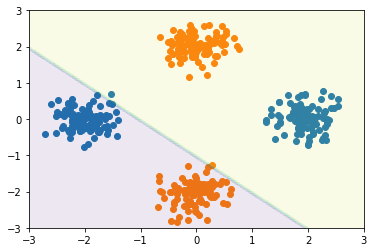

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import torch

def load_data(mode):
    """
    Returns:
    X: (N,D) tensor containing N data points and each point has dimension D
    Y: (N,) tensor with labels {0, 1}
    """
    if mode == "toy_example0":
        toy = sio.loadmat("toy_data0.mat")
        X = torch.tensor(toy["Xdata"])
        Y = torch.tensor(np.ravel(toy["Ydata"]))
        print("X:", X.shape, "Y:", Y.shape)
    
    elif mode == "toy_example":
        toy = sio.loadmat("toy_data.mat")
        X = torch.tensor(toy["Xdata"])
        Y = torch.tensor(np.ravel(toy["Ydata"]))
        print("X:", X.shape, "Y:", Y.shape)
        
    elif mode == "HW_example":
        nuclear = sio.loadmat("nuclear.mat")
        X = torch.tensor(nuclear["x"].T)
        Y = torch.tensor(np.ravel(nuclear["y"]-1)/2)
        #Y = torch.tensor(np.ravel(nuclear["y"]-1)/2) #-1/+1 => 0/1
        print("X:", X.shape, "Y:", Y.shape)
        
    else:
        print("No mode matched:", mode)
        X = torch.tensor([0])
        Y = torch.tensor([0])
        
    return X, Y
            
def plot_data(X, Y):
    """
    Note: only for D=2 now!!
    Input:
    X: (N,D) tensor containing N data points and each point has dimension D
    Y: (N,) tensor with labels
    """
    K = torch.unique(Y, sorted=True)
    for k in range(K.shape[0]):
        plt.scatter(X[Y==K[k], 0], X[Y==K[k], 1])


def plot_classifier(W, plot_range):
    """
    Note: only for D=2 now!!
    Input:
    W: (D,C) tensor where D is data points dimension and C is number of classes
    plot_range = [x_low, x_upper, y_low, y_upper] array like 
    """
    W = np.array(W)
    x = np.linspace(plot_range[0], plot_range[1], 50)
    y = np.linspace(plot_range[2], plot_range[3], 50)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z1 = W[0,0] + W[1,0]*xx + W[2,0]*yy
    z2 = W[0,1] + W[1,1]*xx + W[2,1]*yy
    z = np.argmax(np.dstack((z1, z2)), axis=2)
    h = plt.contourf(x, y, z, alpha=0.1)
    plt.show()



    
# Testing    
X, Y = load_data("toy_example")
plot_data(X, Y)

W = torch.tensor([[1,2],[2,3],[1,2]])
plot_range = [-3, 3, -3, 3]
plot_classifier(W, plot_range)